In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image resizing (Upsampling / Downsampling)

Note that in digital image processing upsampling or downsampling simply means resizing your image. When you upsample you zoom the image and vice-versa. We will use two different spatial domain approach (interpolation method) to achieve this:
1. Nearest Neighbour interpolation/ Pixel replication method [Wiki](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
2. Bilinear interpolation method [Wiki](https://en.wikipedia.org/wiki/Bilinear_interpolation)

In this assignment we will will not analyse the frequency domain signal.

In [1]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-iu6yj8v_
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=c54dccc36fb3a16edcbfd9b08491d1d44fba716d019837992fd7c89c55f0cc26
  Stored in directory: /tmp/pip-ephem-wheel-cache-p2jracwp/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-iu6yj8v_


In [2]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=1, task_no=2) # download data for this assignment

Download Complete!


In [3]:
data = cv2.imread("data/parallel_lines.jpg")

In [4]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    height_origin, width_origin, channels = img.shape
    height_new, width_new = int(np.round(k * height_origin)), int(np.round(k * width_origin))
    out_img = np.zeros([height_new,width_new,channels], dtype=np.uint8)

    for i in range(height_new):
      for j in range(width_new):
        source_pix_x = int( float(i)/float(height_new) * float(height_origin) )  #finding the nearest pixel in original image for interpolation in x
        source_pix_y = int( float(j)/float(width_new) * float(width_origin) )    #finding the nearest pixel in original image for interpolation in y
        source_pix_x = min(source_pix_x, height_origin - 1)                      #handling overflow at boundary in x
        source_pix_y = min(source_pix_y, width_origin - 1)                       #handling overflow at boundary in y
        out_img[i,j,:] = img[source_pix_x,source_pix_y,:]                        #setting the pixel values from original image to output image
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [5]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    height_origin, width_origin, channels = img.shape[0], img.shape[1], img.shape[2]
    height_new, width_new = int(np.round(k * height_origin)), int(np.round(k * width_origin))
    out_img = np.zeros([height_new,width_new,channels], dtype=np.uint8)

    x_ratio = float(width_origin-1) / (width_new-1) if width_new > 1 else 0
    y_ratio = float(height_origin-1) / (height_new-1) if height_new > 1 else 0

    for i in range(height_new):
      for j in range(width_new):
        x_low, y_low = int(np.floor(x_ratio * j)), int(np.floor(y_ratio * i))
        x_high, y_high = int(np.ceil(x_ratio * j)), int(np.ceil(y_ratio * i))

        x_weight = (x_ratio * j) - x_low
        y_weight = (y_ratio * i) - y_low

        out_img[i,j,:] = img[y_low,x_low,:] * (1 - x_weight) * (1 - y_weight) + \
                         img[y_low,x_high,:] * x_weight * (1 - y_weight) + \
                         img[y_high,x_low,:] * y_weight * (1 - x_weight) + \
                         img[y_high,x_high,:] * x_weight * y_weight
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Sample the given image for following values of k = 0.5, 0.51, 0.99, 2, 2.1 using both the methods. 
Plot the images using `cv2_imshow` and write your observation on the differences with an intuitive explanation.


NN resize for k = 0.5


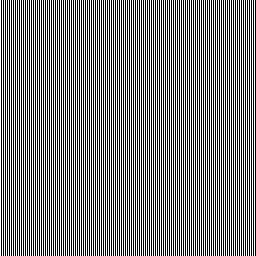

Bilinear resize for k = 0.5


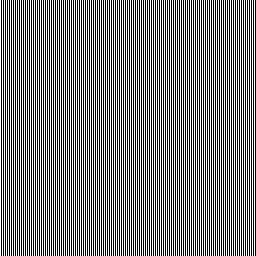

NN resize for k = 0.51


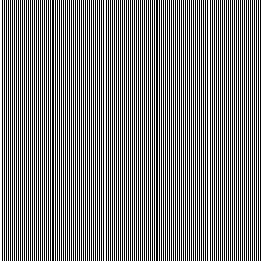

Bilinear resize for k = 0.51


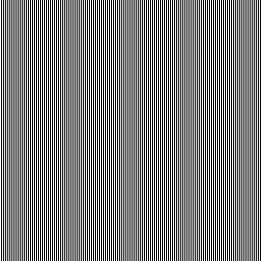

NN resize for k = 0.99


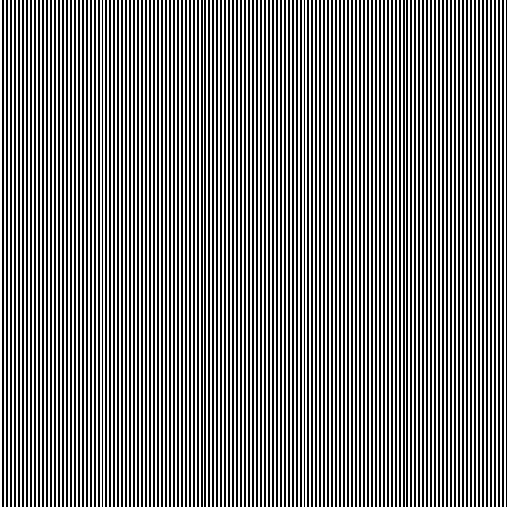

Bilinear resize for k = 0.99


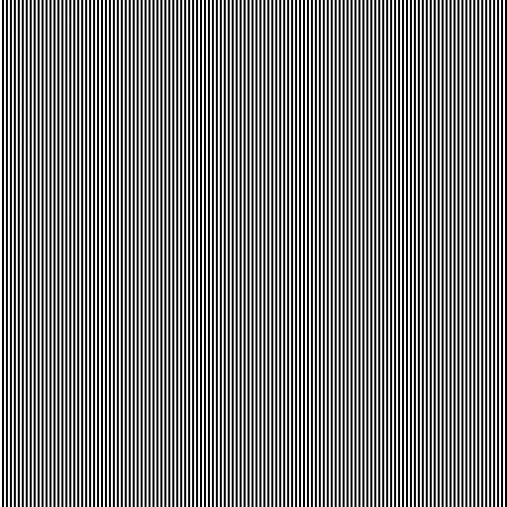

NN resize for k = 2


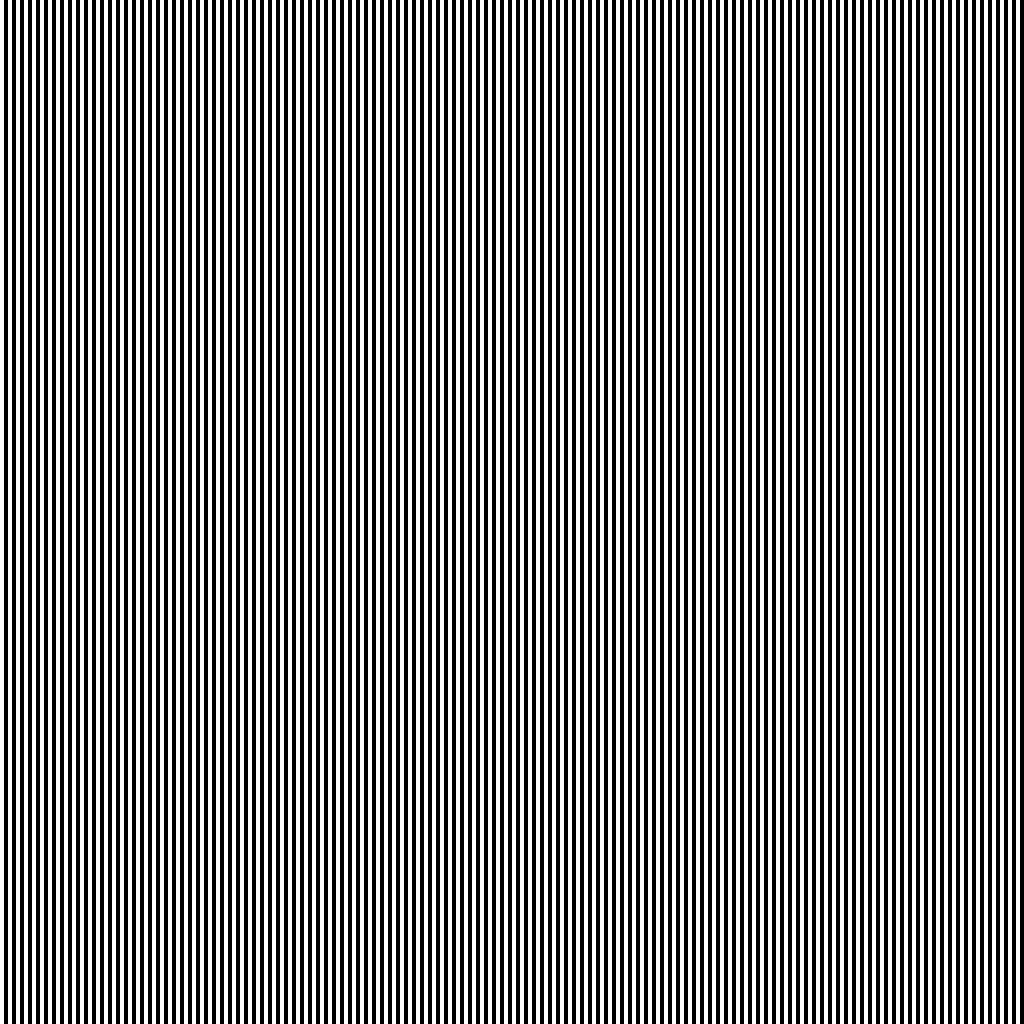

Bilinear resize for k = 2


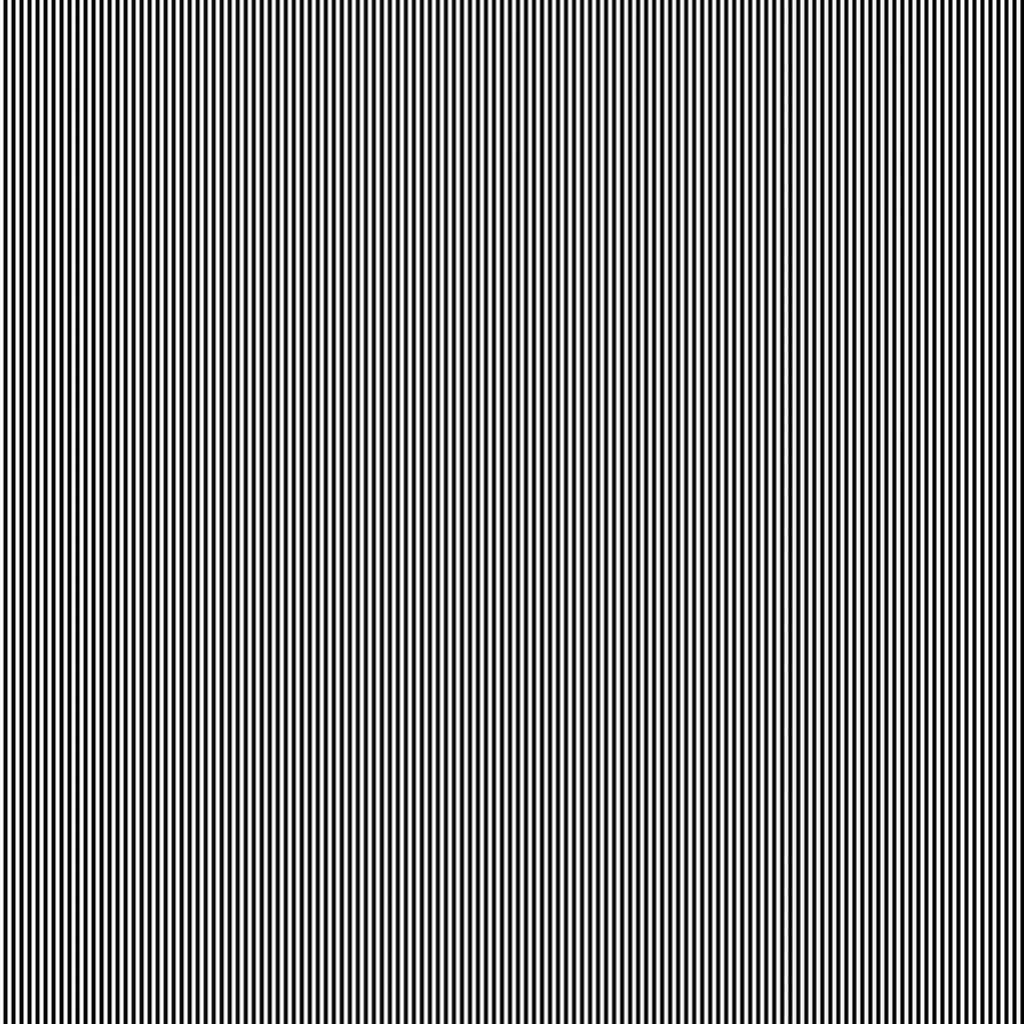

NN resize for k = 2.1


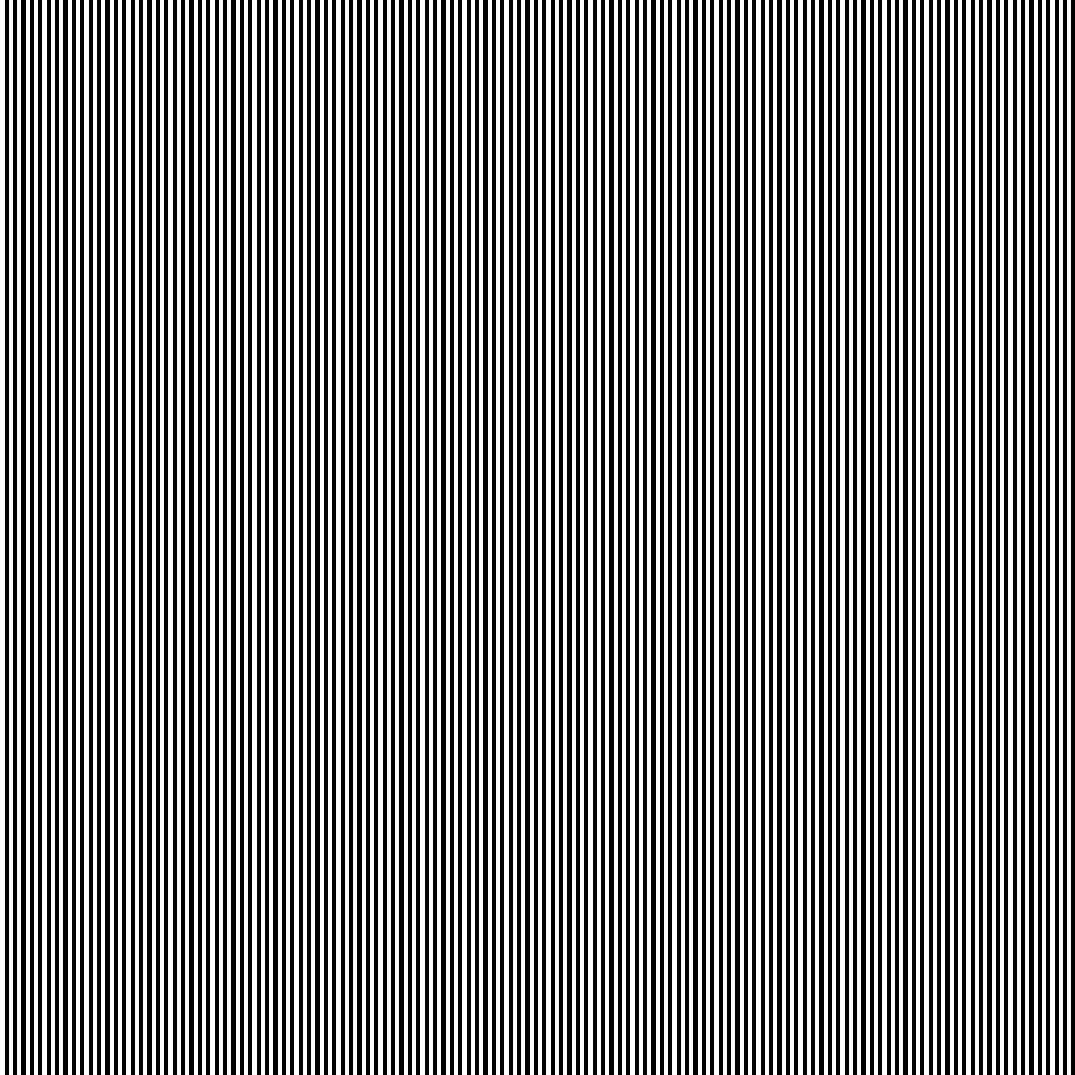

Bilinear resize for k = 2.1


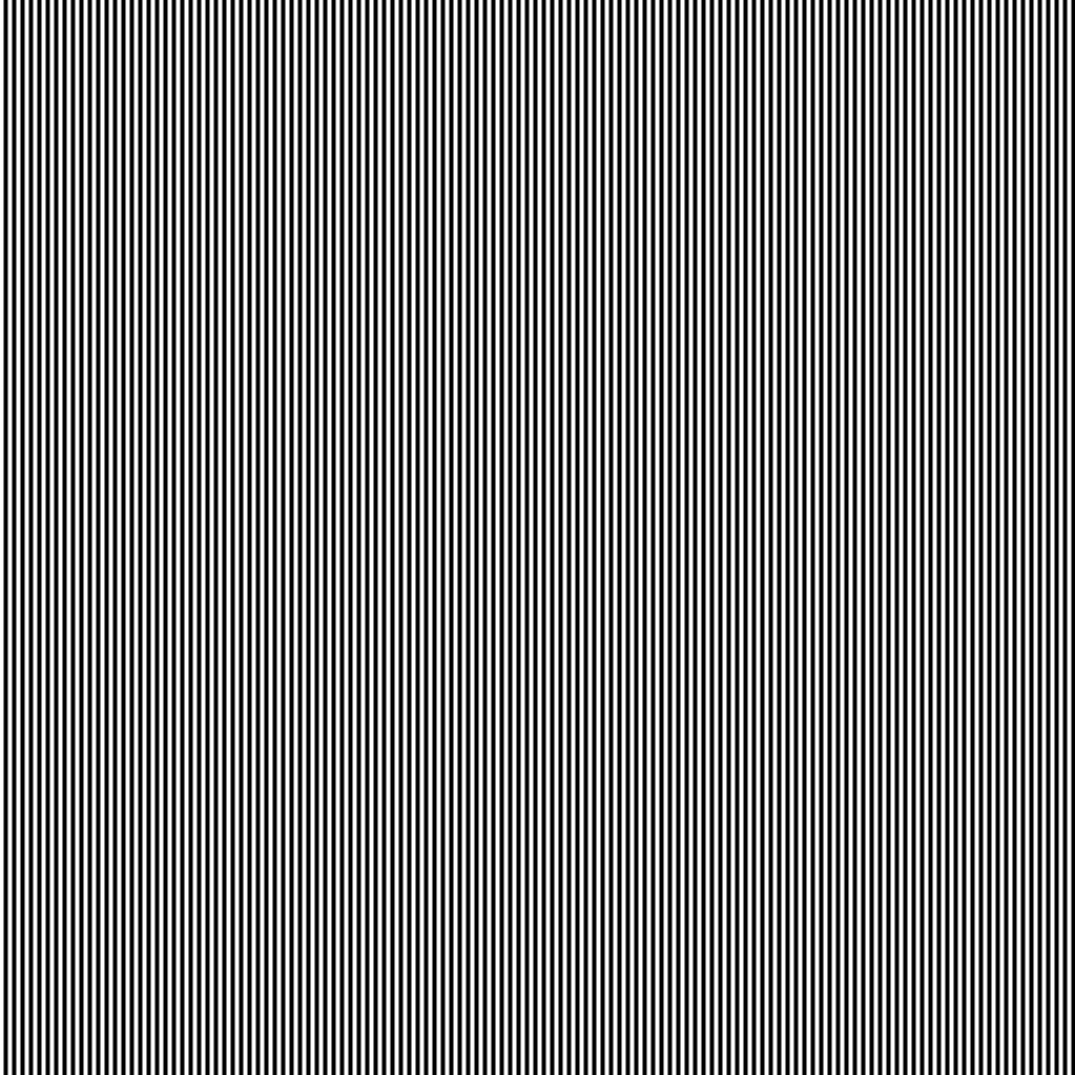

In [6]:
orig_img = np.copy(data) # Resample this image

#############################
# Start your code from here #
#############################

size_factor = [0.5,0.51,0.99,2,2.1]
for k in size_factor:
  nn_out = resize_nn(orig_img, k)
  bilinear_out = resize_bilinear(orig_img, k)
  print('NN resize for k = {}'.format(k))
  cv2_imshow(nn_out)
  print('Bilinear resize for k = {}'.format(k))
  cv2_imshow(bilinear_out)

#############################
# End your code here ########
#############################  

In [7]:
your_observation = """
From the above images we can clearly infer that:-

1. NN interpolation causes dicrete transitions, because it does not involves neighbors in the calculation process rather it only interpolates on 
the basis of nearest pixel. On the other hand there is a smooth transition as we can see in the images that there is no sharp 
boundary in the bilinear interpolation rather it kind of smoothes out the boundaries.

2. The NN resized images seems to have much darker black values in the bar pixels, while bilinear resized images seems to have a dim black pixels 
in the bars because of smoother boundaries due to mixing of black pixel values with the white pixels during interpolating.

3. There is presence of irregularity in the black and white pattern in NN interpolation i.e. some black lines are thicker than others, while 
bilinear shows equidistant patterns.

4. For k = 0.55 and 0.99 there is also formation of large black and white band like pattern in the eye for bilinear interpolation.

"""

print(your_observation)


From the above images we can clearly infer that:-

1. NN interpolation causes dicrete transitions, because it does not involves neighbors in the calculation process rather it only interpolates on 
the basis of nearest pixel. On the other hand there is a smooth transition as we can see in the images that there is no sharp 
boundary in the bilinear interpolation rather it kind of smoothes out the boundaries.

2. The NN resized images seems to have much darker black values in the bar pixels, while bilinear resized images seems to have a dim black pixels 
in the bars because of smoother boundaries due to mixing of black pixel values with the white pixels during interpolating.

3. There is presence of irregularity in the black and white pattern in NN interpolation i.e. some black lines are thicker than others, while 
bilinear shows equidistant patterns.

4. For k = 0.55 and 0.99 there is also formation of large black and white band like pattern in the eye for bilinear interpolation.


